In [2]:
#Importing all essential liabraries
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
# import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Importing Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier 


from sklearn.metrics import accuracy_score
import time

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('SmokeDetectionDataset.csv',index_col = False)
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [6]:
data.shape

(62630, 16)

In [7]:
#Getting all the unique values in each feature
features = data.columns
for feature in features:
    print(f"{feature} ---> {data[feature].nunique()}")

Unnamed: 0 ---> 62630
UTC ---> 62630
Temperature[C] ---> 21672
Humidity[%] ---> 3890
TVOC[ppb] ---> 1966
eCO2[ppm] ---> 1713
Raw H2 ---> 1830
Raw Ethanol ---> 2659
Pressure[hPa] ---> 2213
PM1.0 ---> 1337
PM2.5 ---> 1351
NC0.5 ---> 3093
NC1.0 ---> 4113
NC2.5 ---> 1161
CNT ---> 24994
Fire Alarm ---> 2


In [23]:
# Finding the null value in our dataset
data.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [19]:
data.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
Raw Ethanol,62630.000000,19754.257912,609.513156,15317.000000,19435.000000,19501.000000,20078.000000,21410.000000
Raw H2,62630.000000,12942.453936,272.464305,10668.000000,12830.000000,12924.000000,13109.000000,13803.000000
TVOC[ppb],62630.000000,1942.057528,7811.589055,0.000000,130.000000,981.000000,1189.000000,60000.000000
Pressure[hPa],62630.000000,938.627649,1.331344,930.852000,938.700000,938.816000,939.418000,939.861000
eCO2[ppm],62630.000000,670.021044,1905.885439,400.000000,400.000000,400.000000,438.000000,60000.000000
NC0.5,62630.000000,491.463608,4265.661251,0.000000,8.820000,12.450000,14.420000,61482.030000
NC1.0,62630.000000,203.586487,2214.738556,0.000000,1.384000,1.943000,2.249000,51914.680000
PM2.5,62630.000000,184.467770,1976.305615,0.000000,1.340000,1.880000,2.180000,45432.260000
PM1.0,62630.000000,100.594309,922.524245,0.000000,1.280000,1.810000,2.090000,14333.690000
NC2.5,62630.000000,80.049042,1083.383189,0.000000,0.033000,0.044000,0.051000,30026.438000


<AxesSubplot:xlabel='Fire Alarm', ylabel='Count'>

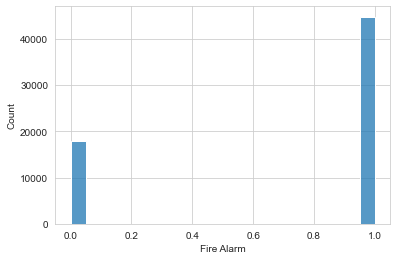

In [20]:
#EDA

# Feature analysis using target variable

sns.set_style("whitegrid")
sns.histplot(data['Fire Alarm'])

<AxesSubplot:>

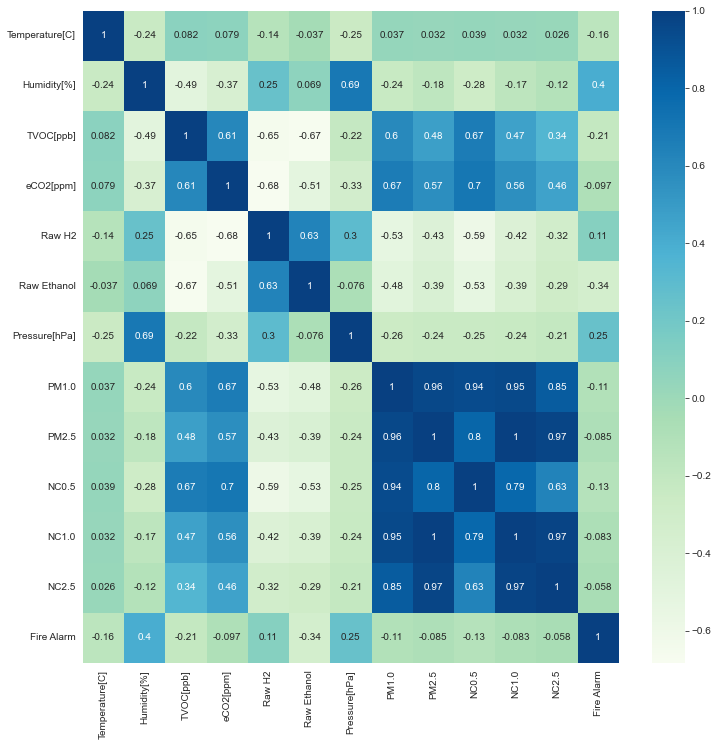

In [21]:
# Heatmap
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(),annot = True,cmap = 'GnBu')

In [25]:
X = data.copy()
X.drop('Fire Alarm',axis = 1,inplace = True)
y = data['Fire Alarm']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [27]:
models = [KNeighborsClassifier(),SGDClassifier(),LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),
         AdaBoostClassifier(),BaggingClassifier(),SVC(),GaussianNB(),DummyClassifier(),ExtraTreeClassifier()]

In [28]:
Name = []
Accuracy = []
Time_Taken = []
for model in models:
    Name.append(type(model).__name__)
    begin = time.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = time.time()
    accuracyScore = accuracy_score(prediction,y_test)
    Accuracy.append(accuracyScore)
    Time_Taken.append(end-begin)
Dict = {'Name':Name,'Accuracy':Accuracy,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Time Taken
0,KNeighborsClassifier,0.998164,0.566679
1,SGDClassifier,0.914737,0.082275
2,LogisticRegression,0.898052,0.671909
3,RandomForestClassifier,1.000000,3.459207
4,GradientBoostingClassifier,0.999521,8.690096
5,AdaBoostClassifier,0.999521,1.777664
6,BaggingClassifier,0.999840,0.929829
7,SVC,0.968306,141.904030
8,GaussianNB,0.766326,0.007467
9,DummyClassifier,0.712199,0.001355


In [ ]:
# Performance matrix of all models
# COnfusion matrix , roc auc , jacard index